# Differential Equation Solver (SKP)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as smp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from sympy import *

## 1st Order ODE

**Question:**  $$ \frac{dy}{dx} = x^2 e^{-x/5} $$

### Symbolic Solution

In [2]:
x = smp.symbols('x')
y = smp.symbols('y', cls=smp.Function)
y = y(x)
de = Eq(y.diff(x), x**2 *smp.exp(-x/5))  # Write the differential equation
display(de)
sol = dsolve(de, ics={y.subs(x,0):0})
print('The solution is,')
display(sol)

Eq(Derivative(y(x), x), x**2*exp(-x/5))

The solution is,


Eq(y(x), -5*x**2*exp(-x/5) - 50*x*exp(-x/5) + 250 - 250*exp(-x/5))

## Numerical Solution by different methods

In [3]:
def dydx(x,y):             # Write the differential equation.
    return x**2 * np.exp(-x/5)

x_0, y_0 = 0, 0          # initial condition
x_min, x_max = x_0, 50   # lower and upper limit of x
dx = (x_max-x_0)/1000    # infinitesimal length

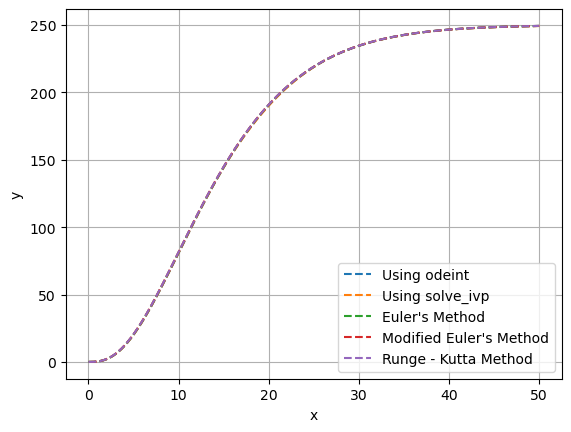

In [4]:
# ALL IN ONE
# Using odeint
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = odeint(dydx, y0=y0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')

# Using solve_ivp
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = solve_ivp(dydx, t_span=(min(x), max(x)), y0=[y0], t_eval=x)
y1 = sol.y[0]
plt.plot(sol.t,y1, '--', label='Using solve_ivp')

# Euler's Method
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    x += h
    y += h*dydx(x,y)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    x += h
    dy = (h/2)*(dydx(x,y) + dydx(x + h, y + h*dydx(x,y)))
    y += dy
    xx.append(x), yy.append(y)
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

# Runge - Kutta Method
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x), yy.append(y)
    x += h
    k1 = h * dydx(x,y)
    k2 = h * dydx(x + (h/2), y + (k1/2))
    k3 = h * dydx(x + (h/2), y + (k2/2))
    k4 = h * dydx(x + h, y + k3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)
plt.plot(xx,yy, '--', label='Runge - Kutta Method')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## 2nd Order ODE

**Question:**  $$ y'' +5y' +6y = x^3 $$

### Symbolic Solution

In [5]:
x = smp.symbols('x')
y = smp.symbols('y', cls=smp.Function)
y = y(x)
de = Eq(y.diff(x,x) + 5*y.diff(x) + 6*y, x**3)  # Write the differential equation
display(de)
sol = dsolve(de, ics={y.subs(x,0):0, y.diff(x).subs(x,0):0})
print('The solution is,')
display(sol)

Eq(6*y(x) + 5*Derivative(y(x), x) + Derivative(y(x), (x, 2)), x**3)

The solution is,


Eq(y(x), x**3/6 - 5*x**2/12 + 19*x/36 - 65/216 + 3*exp(-2*x)/8 - 2*exp(-3*x)/27)

## Numerical Solution by different methods

In [6]:
# Write the differential equation. (dy/dx = yp)

def dSdx(x,S):
    y, yp = S
    return [yp, x**3 - 6*y - 5*yp] 

def dydx(x,y,yp):
    return yp
def dypdx(x,y,yp):
    return x**3 - 6*y - 5*yp

x_0, y_0, yp_0 = 0, 0, 0   # initial conditions
x_min, x_max = x_0, 20   # lower and upper limit of x
dx = (x_max-x_0)/1000    # infinitesimal length

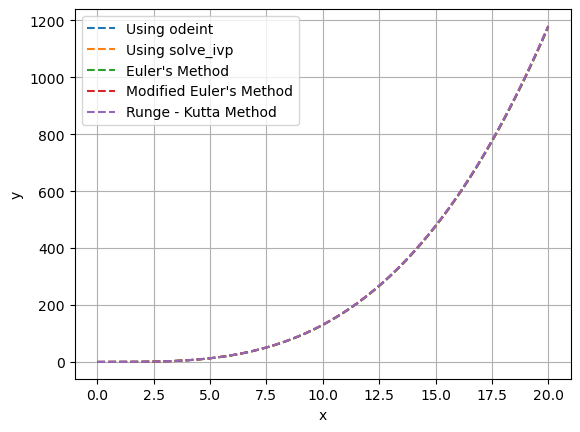

In [7]:
# ALL IN ONE
# Using odeint
y0, yp0 = y_0, yp_0
S0 = (y0,yp0)
x = np.linspace(x_min, x_max,200)
sol = odeint(dSdx, y0=S0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')

# Using solve_ivp
y0, yp0 = y_0, yp_0
S0 = (y0,yp0)
x = np.linspace(x_min, x_max,200)
sol = solve_ivp(dSdx, t_span=(min(x), max(x)), y0=S0, t_eval=x)
y1 = sol.y[0]
plt.plot(sol.t, y1, '--', label='Using solve_ivp')

# Euler's Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = dx
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    x += h
    y += h*dydx(x,y,yp)
    yp += h*dypdx(x,y,yp)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = dx
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    x += h
    dy = (h/2)*(dydx(x,y,yp) + dydx(x+h, y+h*dydx(x,y,yp), yp+h*dypdx(x,y,yp)))
    dyp = (h/2)*(dypdx(x,y,yp) + dypdx(x+h, y+h*dydx(x,y,yp), yp+h*dypdx(x,y,yp)))
    y += dy
    yp += dyp
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

# Runge - Kutta Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = dx
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x), yy.append(y), yyp.append(yp)
    x += h
    k1 = h * dydx(x,y,yp)
    l1 = h * dypdx(x,y, yp)
    k2 = h * dydx(x + (h/2), y + (k1/2), yp + (l1/2))
    l2 = h * dypdx(x + (h/2), y + (k1/2), yp + (l1/2))
    k3 = h * dydx(x * (h/2), y + (k2/2), yp + (l2/2))
    l3 = h * dypdx(x + (h/2), y + (k2/2), yp + (l2/2))
    k4 = h * dydx(x + h, y + k3, yp + l3)
    l4 = h * dypdx(x + h, y + k3, yp + l3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)
    yp += (1/6)*(l1 + 2*(l2 + l3) + l4)
plt.plot(xx,yy, '--', label='Runge - Kutta Method')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## 3rd Order ODE

**Question:**  $$ y''' -2y'' -y' +2y = x^2 $$

### Symbolic Solution

In [8]:
x = smp.symbols('x')
y = smp.symbols('y', cls=smp.Function)
y = y(x)
de = Eq(y.diff(x,x,x) - 2*y.diff(x,x) - y.diff(x) + 2*y, x**2)  # Write the differential equation
display(de)
sol = dsolve(de, ics={y.subs(x,0):0, y.diff(x).subs(x,0):0})
print('The solution is,')
display(sol)

Eq(2*y(x) - Derivative(y(x), x) - 2*Derivative(y(x), (x, 2)) + Derivative(y(x), (x, 3)), x**2)

The solution is,


Eq(y(x), C3*exp(2*x) + x**2/2 + x/2 + (-3*C3/2 - 7/8)*exp(x) + (C3/2 - 3/8)*exp(-x) + 5/4)

## Numerical Solution by different methods

In [9]:
# Write the differential equation. (dy/dx = yp, d2y/dx2 = ypp)

def dSdx(x,S):
    y, yp, ypp = S
    return [yp, ypp, 2*ypp + yp - 2*y + x**2] 

def dydx(x,y,yp,ypp):
    return yp
def dypdx(x,y,yp,ypp):
    return ypp
def dyppdx(x,y,yp,ypp):
    return 2*ypp + yp - 2*y + x**2

x_0, y_0, yp_0, ypp_0 = 0, 0, 0, 0  # initial conditions
x_min, x_max = x_0, 10     # lower and upper limit of x
dx = (x_max-x_0)/1000    # infinitesimal length

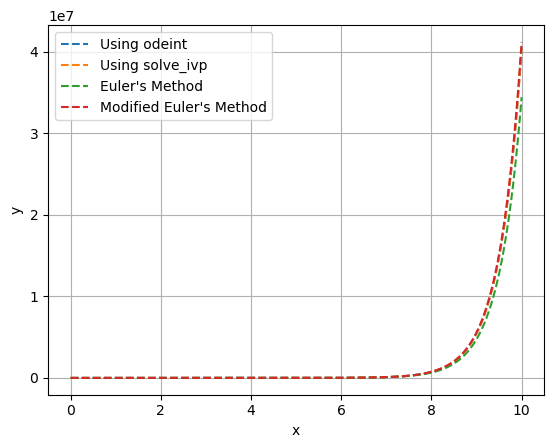

In [10]:
# ALL IN ONE
# Using odeint
y0, yp0, ypp0 = y_0, yp_0, ypp_0
S0 = (y0,yp0,ypp0)
x = np.linspace(x_min, x_max,200)
sol = odeint(dSdx, y0=S0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')

# Using solve_ivp
y0, yp0, ypp0 = y_0, yp_0, ypp_0
S0 = (y0,yp0,ypp0)
x = np.linspace(x_min, x_max,200)
sol = solve_ivp(dSdx, t_span=(min(x), max(x)), y0=S0, t_eval=x)
y1 = sol.y[0]
plt.plot(sol.t,y1, '--', label='Using solve_ivp')

# Euler's Method
x, y, yp, ypp = x_0, y_0, yp_0, ypp_0
xmax = x_max
h = dx
xx, yy, yyp, yypp = [], [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    yypp.append(ypp)
    x += h
    y += h*dydx(x,y,yp,ypp)
    yp += h*dypdx(x,y,yp,ypp)
    ypp += h*dyppdx(x,y,yp,ypp)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y, yp, ypp = x_0, y_0, yp_0, ypp_0
xmax = x_max
h = dx
xx, yy, yyp, yypp = [], [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    yypp.append(ypp)
    x += h
    dy = (h/2) * (dydx(x,y,yp,ypp) + 
dydx(x+h, y+h*dydx(x,y,yp,ypp), yp+h*dypdx(x,y,yp,ypp), ypp+h*dyppdx(x,y,yp,ypp)))
    dyp = (h/2) * (dypdx(x,y,yp,ypp) + 
dypdx(x+h, y+h*dydx(x,y,yp,ypp), yp+h*dypdx(x,y,yp,ypp), ypp+h*dyppdx(x,y,yp,ypp)))
    dypp = (h/2) * (dyppdx(x,y,yp,ypp) + 
dyppdx(x+h, y+h*dydx(x,y,yp,ypp), yp+h*dypdx(x,y,yp,ypp), ypp+h*dyppdx(x,y,yp,ypp)))
    y += dy
    yp += dyp
    ypp += dypp
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## 4th Order ODE

**Question:**  $$ y'''' -2y''' -y'' +2y' = x^2 $$

### Symbolic Solution

In [11]:
x = smp.symbols('x')
y = smp.symbols('y', cls=smp.Function)
y = y(x)
de = Eq(y.diff(x,x,x,x) - 2*y.diff(x,x,x) - y.diff(x,x) + 2*y.diff(x), x**2)  # Write the differential equation
display(de)
sol = dsolve(de, ics={y.subs(x,0):0, y.diff(x).subs(x,0):0})
print('The solution is,')
display(sol)

Eq(2*Derivative(y(x), x) - Derivative(y(x), (x, 2)) - 2*Derivative(y(x), (x, 3)) + Derivative(y(x), (x, 4)), x**2)

The solution is,


Eq(y(x), C3*exp(x) - 2*C3 + C4*exp(2*x) - 3*C4 + x**3/6 + x**2/4 + 5*x/4 + (C3 + 2*C4 + 5/4)*exp(-x) - 5/4)

## Numerical Solution by different methods

In [12]:
# Write the differential equation. (dy/dx=yp, d2y/dx2=ypp, d3ydx3=yppp)

def dSdx(x,S):
    y, yp, ypp, yppp = S
    return [yp, ypp, yppp, 2*yppp + ypp - 2*yp + x**2] 

def dydx(x,y,yp,ypp,yppp):
    return yp
def dypdx(x,y,yp,ypp,yppp):
    return ypp
def dyppdx(x,y,yp,ypp,yppp):
    return yppp
def dypppdx(x,y,yp,ypp,yppp):
    return 2*yppp + ypp - 2*yp + x**2

x_0,y_0,yp_0,ypp_0,yppp_0 = 0,0,0,0,0  # initial conditions
x_min, x_max = x_0, 10   # lower and upper limit of x
dx = (x_max-x_0)/1000    # infinitesimal length

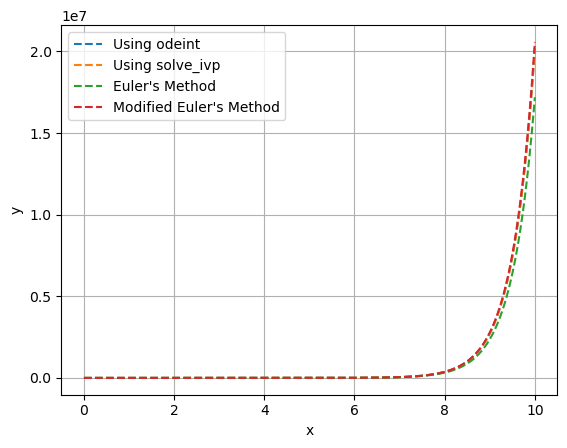

In [13]:
# ALL IN ONE
# Using odeint
y0, yp0, ypp0, yppp0 = y_0, yp_0, ypp_0, yppp_0
S0 = (y0,yp0,ypp0,yppp0)
x = np.linspace(x_min, x_max,200)
sol = odeint(dSdx, y0=S0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')

# Using solve_ivp
y0, yp0, ypp0, yppp0 = y_0, yp_0, ypp_0, yppp_0
S0 = (y0,yp0,ypp0,yppp0)
x = np.linspace(x_min, x_max,200)
sol = solve_ivp(dSdx, t_span=(min(x), max(x)), y0=S0, t_eval=x)
y1 = sol.y[0]
plt.plot(sol.t,y1, '--', label='Using solve_ivp')

# Euler's Method
x, y, yp, ypp, yppp = x_0, y_0, yp_0, ypp_0, yppp_0
xmax = x_max
h = dx
xx, yy, yyp, yypp, yyppp = [], [], [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    yypp.append(ypp)
    yyppp.append(yppp)
    x += h
    y += h*dydx(x,y,yp,ypp,yppp)
    yp += h*dypdx(x,y,yp,ypp,yppp)
    ypp += h*dyppdx(x,y,yp,ypp,yppp)
    yppp += h*dypppdx(x,y,yp,ypp,yppp)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y, yp, ypp, yppp = x_0, y_0, yp_0, ypp_0, yppp_0
xmax = x_max
h = dx
xx, yy, yyp, yypp, yyppp = [], [], [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    yypp.append(ypp)
    yyppp.append(yppp)
    x += h
    dy = (h/2) * (dydx(x,y,yp,ypp,yppp) + 
dydx(x+h, y+h*dydx(x,y,yp,ypp,yppp), yp+h*dypdx(x,y,yp,ypp,yppp), 
ypp+h*dyppdx(x,y,yp,ypp,yppp), yppp+h*dypppdx(x,y,yp,ypp,yppp)))
    dyp = (h/2) * (dypdx(x,y,yp,ypp,yppp) + 
dypdx(x+h, y+h*dydx(x,y,yp,ypp,yppp), yp+h*dypdx(x,y,yp,ypp,yppp), 
ypp+h*dyppdx(x,y,yp,ypp,yppp), yppp+h*dypppdx(x,y,yp,ypp,yppp)))
    dypp = (h/2) * (dyppdx(x,y,yp,ypp,yppp) + 
dyppdx(x+h, y+h*dydx(x,y,yp,ypp,yppp), yp+h*dypdx(x,y,yp,ypp,yppp), 
ypp+h*dyppdx(x,y,yp,ypp,yppp), yppp+h*dypppdx(x,y,yp,ypp,yppp)))
    dyppp = (h/2) * (dypppdx(x,y,yp,ypp,yppp) + 
dypppdx(x+h, y+h*dydx(x,y,yp,ypp,yppp), yp+h*dypdx(x,y,yp,ypp,yppp), 
ypp+h*dyppdx(x,y,yp,ypp,yppp), yppp+h*dypppdx(x,y,yp,ypp,yppp)))
    y += dy
    yp += dyp
    ypp += dypp
    yppp += dyppp
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()